In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [17]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\기상청 기상자료개방포털\공항기상관측\*.csv')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\기상청 기상자료개방포털\\공항기상관측\\OBS_AMOS_DD_20230113123005.csv']

In [18]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,지점,지점명,일시,평균풍속(KT),최대풍속(KT),최대순간풍속(KT),최대풍속 나타난시각(hhmi),최대순간풍속 나타난시각(hhmi),최대풍속 풍향(deg),최대순간풍속 풍향(deg),...,1시간최다강수 시각(hhmi),30분최다강수(mm),10분최다강수(mm),최심신적설(cm),최심적설(cm),평균운량(1/8),5/8이상최저운고(FT),평균이슬점온도(°C),평균상대습도(%),기사란
0,92,양양공항,2018-01-01,11.0,20,28,2044,2004,260,260,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-17.1,25,NaN
1,92,양양공항,2018-01-02,13.2,23,31,906,901,250,250,...,NaN,NaN,NaN,NaN,NaN,2.2,20000.0,-16.6,24,NaN
2,92,양양공항,2018-01-03,8.7,12,15,2158,2153,260,270,...,NaN,NaN,NaN,NaN,NaN,1.2,NaN,-16.7,29,NaN
3,92,양양공항,2018-01-04,5.8,12,16,125,125,270,260,...,NaN,NaN,NaN,NaN,NaN,7.3,2500.0,-10.2,48,NaN
4,92,양양공항,2018-01-05,9.8,17,23,1931,1956,250,250,...,NaN,NaN,NaN,NaN,NaN,4.6,18000.0,-9.9,44,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12776 entries, 0 to 12775
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   지점                  12776 non-null  int64  
 1   지점명                 12776 non-null  object 
 2   일시                  12776 non-null  object 
 3   평균풍속(KT)            12776 non-null  float64
 4   최대풍속(KT)            12776 non-null  int64  
 5   최대순간풍속(KT)          12776 non-null  int64  
 6   최대풍속 나타난시각(hhmi)    12776 non-null  int64  
 7   최대순간풍속 나타난시각(hhmi)  12776 non-null  int64  
 8   최대풍속 풍향(deg)        12776 non-null  int64  
 9   최대순간풍속 풍향(deg)      12776 non-null  int64  
 10  최단시정현상              3338 non-null   float64
 11  최고기온(°C)            12776 non-null  float64
 12  최저기온(°C)            12776 non-null  float64
 13  최고기온시각(hhmi)        12776 non-null  int64  
 14  최저기온시각(hhmi)        12776 non-null  int64  
 15  평균해면기압(hPa)         12776 non-null  float64
 16  최고해면

In [20]:
df.describe()

,지점,평균풍속(KT),최대풍속(KT),최대순간풍속(KT),최대풍속 나타난시각(hhmi),최대순간풍속 나타난시각(hhmi),최대풍속 풍향(deg),최대순간풍속 풍향(deg),최단시정현상,최고기온(°C),...,1시간최다강수(mm),1시간최다강수 시각(hhmi),30분최다강수(mm),10분최다강수(mm),최심신적설(cm),최심적설(cm),평균운량(1/8),5/8이상최저운고(FT),평균이슬점온도(°C),평균상대습도(%)
count,12776.000000,12776.000000,12776.000000,12776.000000,12776.000000,12776.000000,12776.000000,12776.000000,3338.000000,12776.000000,...,2898.000000,2117.000000,2896.000000,2896.000000,179.000000,215.000000,12775.000000,10363.000000,12776.000000,12776.000000
mean,139.716421,6.932858,13.905291,21.022386,1194.837195,1233.501018,222.320758,220.018003,35.237867,18.642110,...,5.060697,1013.869627,3.621754,2.027314,1.809497,2.675349,4.135703,6986.914986,7.584941,68.173842
std,31.793612,3.126652,5.184090,8.123853,616.168975,593.224500,106.423843,105.381423,27.335511,9.257929,...,9.039427,740.828165,6.238113,3.164355,2.392185,3.434718,2.494833,6733.064679,11.367719,16.155097
min,92.000000,1.700000,4.000000,6.000000,1.000000,1.000000,10.000000,10.000000,5.000000,-11.800000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.300000,12.000000
25%,110.000000,4.700000,10.000000,15.000000,835.000000,940.000000,140.000000,130.000000,10.000000,11.400000,...,0.000000,336.000000,0.000000,0.000000,0.300000,0.400000,2.000000,2500.000000,-0.700000,58.000000
50%,151.000000,6.100000,13.000000,19.000000,1326.000000,1336.000000,250.000000,250.000000,41.000000,19.600000,...,1.500000,915.000000,1.000000,0.600000,0.800000,1.500000,4.200000,3000.000000,7.800000,70.000000
75%,167.000000,8.400000,17.000000,25.000000,1605.000000,1605.000000,320.000000,310.000000,61.000000,26.200000,...,5.800000,1708.000000,4.000000,2.500000,3.000000,3.550000,6.300000,12000.000000,17.500000,80.000000
max,182.000000,30.000000,51.000000,77.000000,2400.000000,2400.000000,360.000000,360.000000,97.000000,38.400000,...,81.500000,2344.000000,65.000000,24.000000,19.500000,20.500000,8.000000,25000.000000,27.200000,100.000000


In [75]:
df.describe(include=np.object)

,지점명,일시,기사란
count,12776,12776,3737
unique,7,1826,3407
top,여수공항,2018-01-01,{박무}2400-2400.
freq,1826,7,25


In [76]:
df.isnull().sum()

지점                        0
지점명                       0
일시                        0
평균풍속(KT)                  0
최대풍속(KT)                  0
최대순간풍속(KT)                0
최대풍속 나타난시각(hhmi)          0
최대순간풍속 나타난시각(hhmi)        0
최대풍속 풍향(deg)              0
최대순간풍속 풍향(deg)            0
최단시정현상                 9438
최고기온(°C)                  0
최저기온(°C)                  0
최고기온시각(hhmi)              0
최저기온시각(hhmi)              0
평균해면기압(hPa)               0
최고해면기압(hPa)               0
최저해면기압(hPa)               0
강수량합(mm)               8248
1시간최다강수(mm)            9878
1시간최다강수 시각(hhmi)      10659
30분최다강수(mm)            9880
10분최다강수(mm)            9880
최심신적설(cm)             12597
최심적설(cm)              12561
평균운량(1/8)                 1
5/8이상최저운고(FT)          2413
평균이슬점온도(°C)               0
평균상대습도(%)                 0
기사란                    9039
dtype: int64

## 전처리

In [21]:
df.drop(['기사란','지점'],axis=1,inplace=True)

In [22]:
df.fillna(-273,inplace=True)

In [23]:
def convert_year(x):
    return datetime.strptime(x,'%Y-%m-%d').year

def convert_month(x):
    return datetime.strptime(x,'%Y-%m-%d').month

def convert_day(x):
    return datetime.strptime(x,'%Y-%m-%d').day

df['년도'] = df['일시'].apply(convert_year)
df['월'] = df['일시'].apply(convert_month)
df['일'] = df['일시'].apply(convert_day)

In [24]:
def convert_hhmi(x):
    m = x%100
    h = x//100
    return h + m*10/600
df['최대풍속 나타난시각(hhmi)'] = df['최대풍속 나타난시각(hhmi)'].apply(convert_hhmi)
df['최대순간풍속 나타난시각(hhmi)'] = df['최대순간풍속 나타난시각(hhmi)'].apply(convert_hhmi)

## 시각화

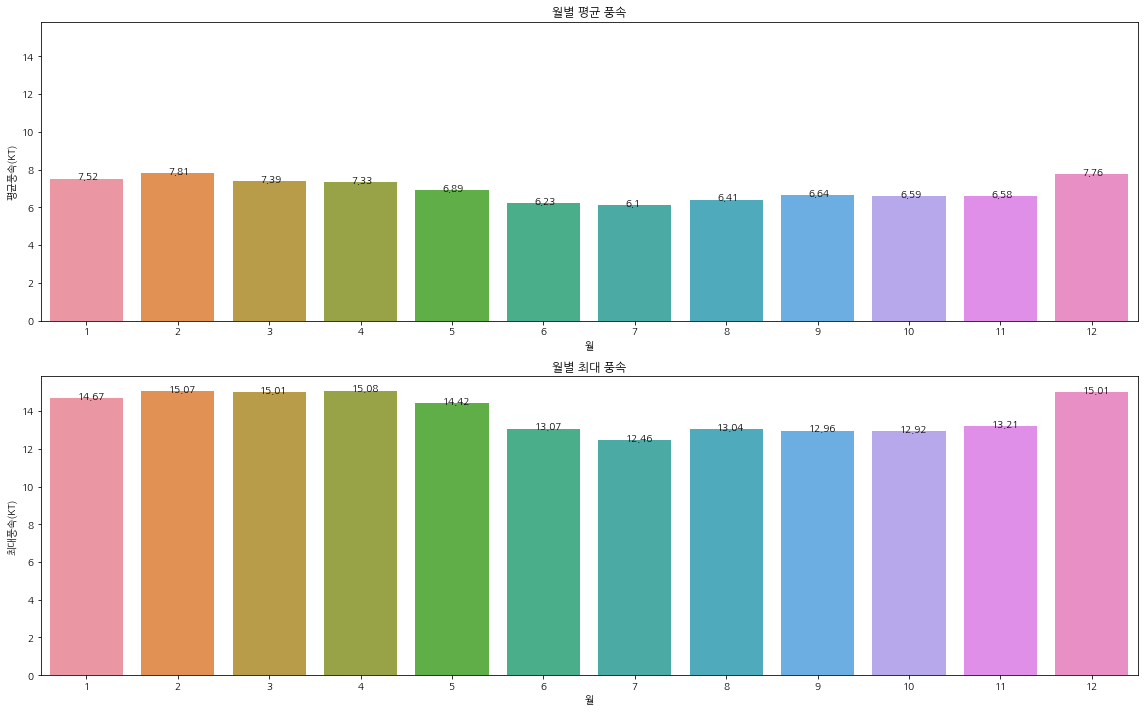

In [25]:
sub_df = df[df['평균풍속(KT)']>-1].groupby(['월'],as_index=False)['평균풍속(KT)','최대풍속(KT)'].mean()
fig,axes = plt.subplots(2,1,figsize=(16,10),sharey=True)
sns.barplot(data=sub_df,x='월',y='평균풍속(KT)',ax=axes[0]).set(title='월별 평균 풍속')
for j in range(12):
    h = axes[0].patches[j].get_height()
    x = axes[0].patches[j].get_x()
    v = sub_df['평균풍속(KT)'].values[j]
    axes[0].annotate(str(round(v,2)),(x*1+0.3, h))

sns.barplot(data=sub_df,x='월',y='최대풍속(KT)',ax=axes[1]).set(title='월별 최대 풍속')
for j in range(12):
    h = axes[1].patches[j].get_height()
    x = axes[1].patches[j].get_x()
    v = sub_df['최대풍속(KT)'].values[j]
    axes[1].annotate(str(round(v,2)),(x*1+0.3, h))
plt.tight_layout()

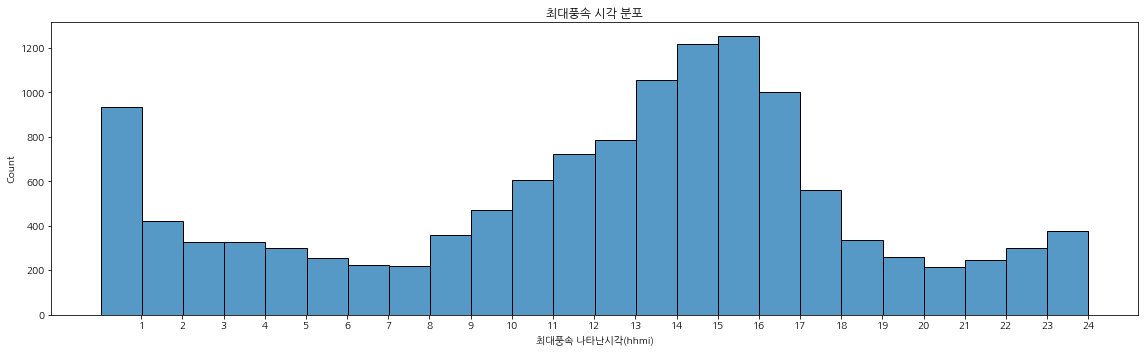

In [26]:
fig,axes = plt.subplots(1,1,figsize=(16,5))
sns.histplot(data=df,x='최대풍속 나타난시각(hhmi)',bins=24,ax=axes).set(title='최대풍속 시각 분포')
plt.xticks(range(1,25),range(1,25))
plt.tight_layout()

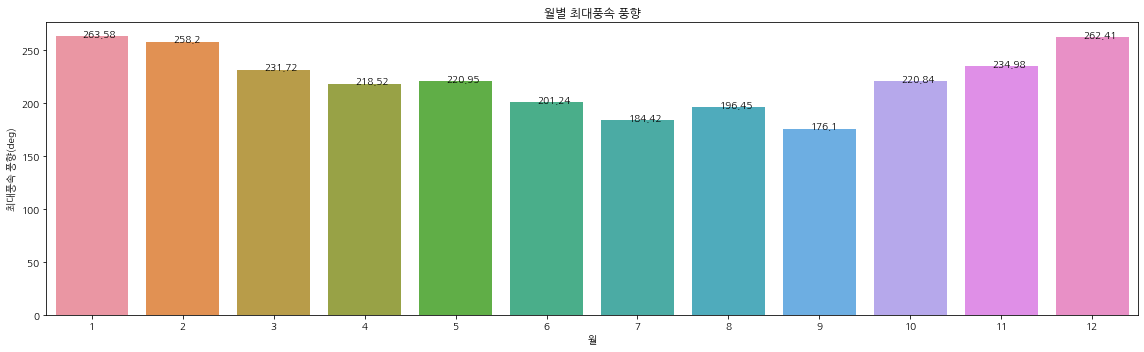

In [27]:
sub_df = df[df['최대풍속 풍향(deg)']>-1].groupby(['월'],as_index=False)['최대풍속 풍향(deg)'].mean()
fig,axes = plt.subplots(1,1,figsize=(16,5),sharey=True)
sns.barplot(data=sub_df,x='월',y='최대풍속 풍향(deg)',ax=axes).set(title='월별 최대풍속 풍향')
for j in range(12):
    h = axes.patches[j].get_height()
    x = axes.patches[j].get_x()
    v = sub_df['최대풍속 풍향(deg)'].values[j]
    axes.annotate(str(round(v,2)),(x*1+0.3, h))

plt.tight_layout()

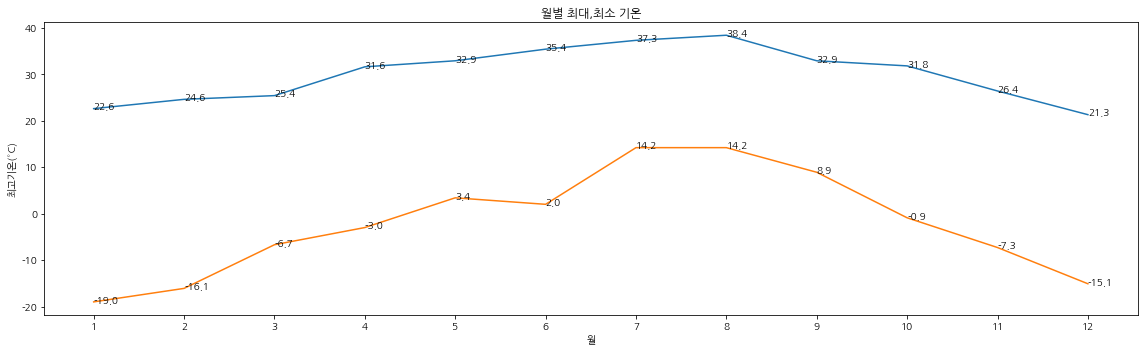

In [28]:
sub_df1 = df[df['최고기온(°C)']>-273].groupby(['월'],as_index=False)['최고기온(°C)'].max()
sub_df2 = df[df['최저기온(°C)']>-273].groupby(['월'],as_index=False)['최저기온(°C)'].min()
sub_df1 = sub_df1.astype({'월':'str'})
sub_df2 = sub_df2.astype({'월':'str'})

fig,axes = plt.subplots(1,1,figsize=(16,5))

m_list = [str(m) for m in range(1,13)]

sns.lineplot(data=sub_df1,x='월',y='최고기온(°C)',ax=axes)
sns.lineplot(data=sub_df2,x='월',y='최저기온(°C)',ax=axes)
axes.set_title('월별 최대,최소 기온')
for row1,row2 in zip(sub_df1.iterrows(),sub_df2.iterrows()):
    p_x1,p_y1 = row1[1]
    p_x2,p_y2 = row2[1]
    axes.text(p_x1,p_y1,f'{p_y1}')
    axes.text(p_x2,p_y2,f'{p_y2}')
plt.tight_layout()

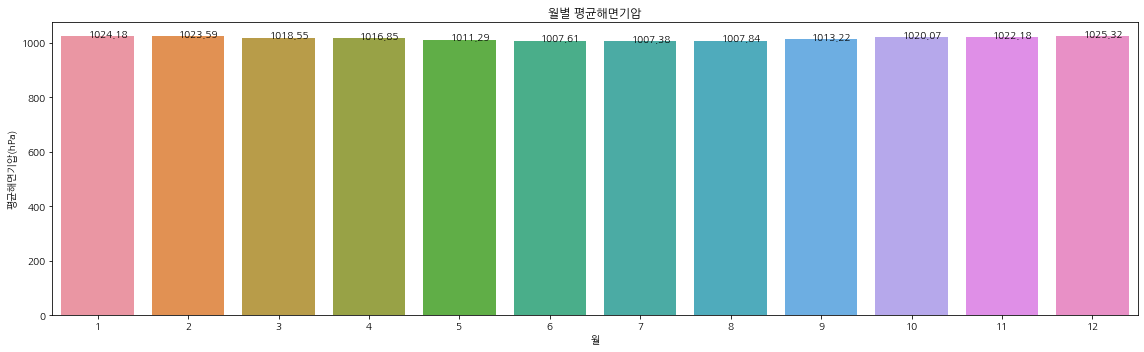

In [98]:
sub_df = df[df['평균해면기압(hPa)']>-1].groupby(['월'],as_index=False)['평균해면기압(hPa)'].mean()
fig,axes = plt.subplots(1,1,figsize=(16,5),sharey=True)
sns.barplot(data=sub_df,x='월',y='평균해면기압(hPa)',ax=axes).set(title='월별 평균해면기압')
for j in range(12):
    h = axes.patches[j].get_height()
    x = axes.patches[j].get_x()
    v = sub_df['평균해면기압(hPa)'].values[j]
    axes.annotate(str(round(v,2)),(x*1+0.3, h))

plt.tight_layout()

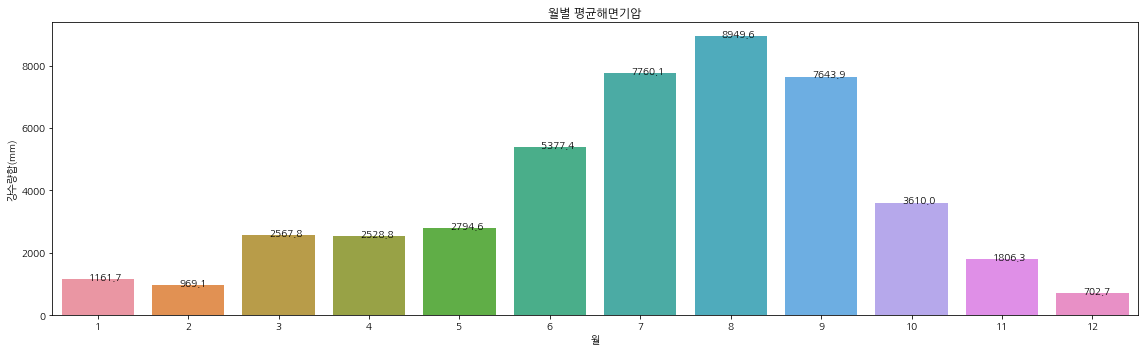

In [99]:
sub_df = df[df['강수량합(mm)']>-1].groupby(['월'],as_index=False)['강수량합(mm)'].sum()
fig,axes = plt.subplots(1,1,figsize=(16,5),sharey=True)
sns.barplot(data=sub_df,x='월',y='강수량합(mm)',ax=axes).set(title='월별 평균해면기압')
for j in range(12):
    h = axes.patches[j].get_height()
    x = axes.patches[j].get_x()
    v = sub_df['강수량합(mm)'].values[j]
    axes.annotate(str(round(v,2)),(x*1+0.3, h))

plt.tight_layout()

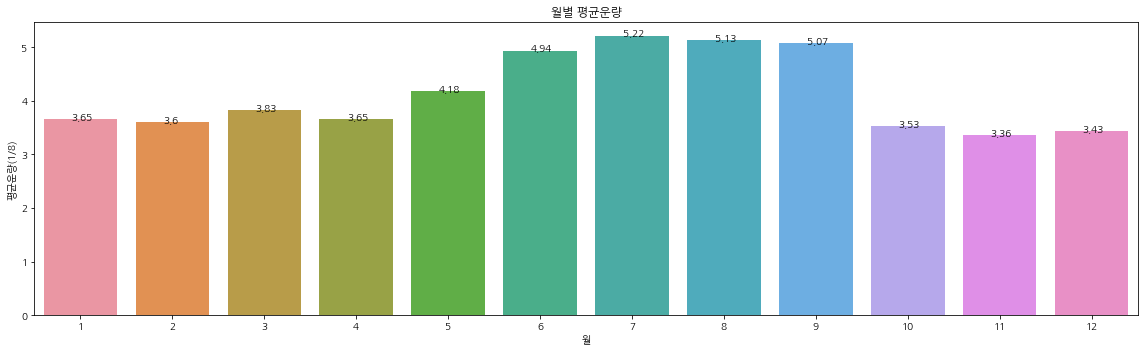

In [100]:
sub_df = df[df['평균운량(1/8)']>-1].groupby(['월'],as_index=False)['평균운량(1/8)'].mean()
fig,axes = plt.subplots(1,1,figsize=(16,5),sharey=True)
sns.barplot(data=sub_df,x='월',y='평균운량(1/8)',ax=axes).set(title='월별 평균운량')
for j in range(12):
    h = axes.patches[j].get_height()
    x = axes.patches[j].get_x()
    v = sub_df['평균운량(1/8)'].values[j]
    axes.annotate(str(round(v,2)),(x*1+0.3, h))

plt.tight_layout()

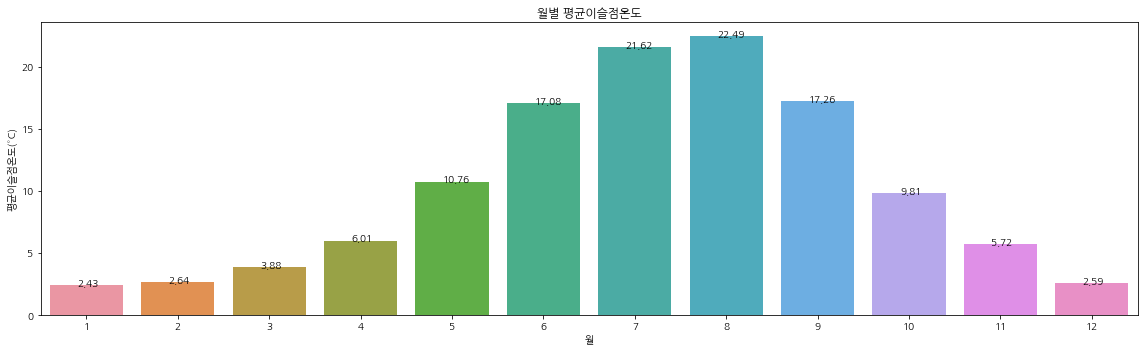

In [101]:
sub_df = df[df['평균이슬점온도(°C)']>-1].groupby(['월'],as_index=False)['평균이슬점온도(°C)'].mean()
fig,axes = plt.subplots(1,1,figsize=(16,5),sharey=True)
sns.barplot(data=sub_df,x='월',y='평균이슬점온도(°C)',ax=axes).set(title='월별 평균이슬점온도')
for j in range(12):
    h = axes.patches[j].get_height()
    x = axes.patches[j].get_x()
    v = sub_df['평균이슬점온도(°C)'].values[j]
    axes.annotate(str(round(v,2)),(x*1+0.3, h))

plt.tight_layout()

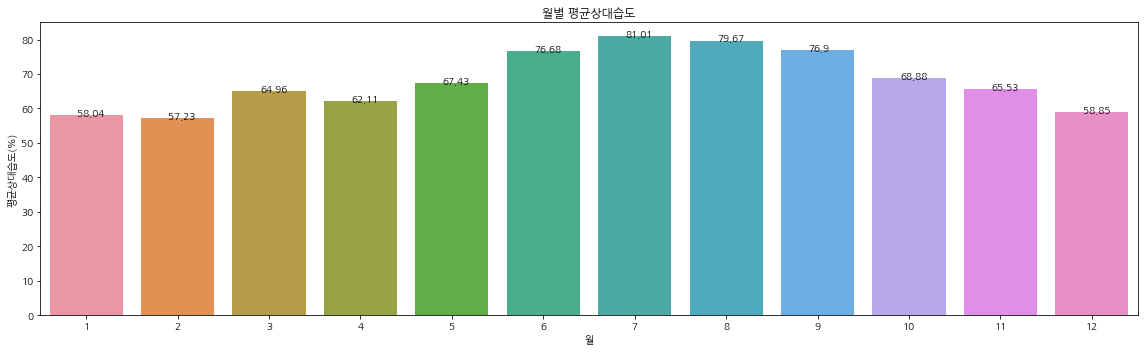

In [103]:
sub_df = df[df['평균상대습도(%)']>-1].groupby(['월'],as_index=False)['평균상대습도(%)'].mean()
fig,axes = plt.subplots(1,1,figsize=(16,5),sharey=True)
sns.barplot(data=sub_df,x='월',y='평균상대습도(%)',ax=axes).set(title='월별 평균상대습도')
for j in range(12):
    h = axes.patches[j].get_height()
    x = axes.patches[j].get_x()
    v = sub_df['평균상대습도(%)'].values[j]
    axes.annotate(str(round(v,2)),(x*1+0.3, h))

plt.tight_layout()

<AxesSubplot: >

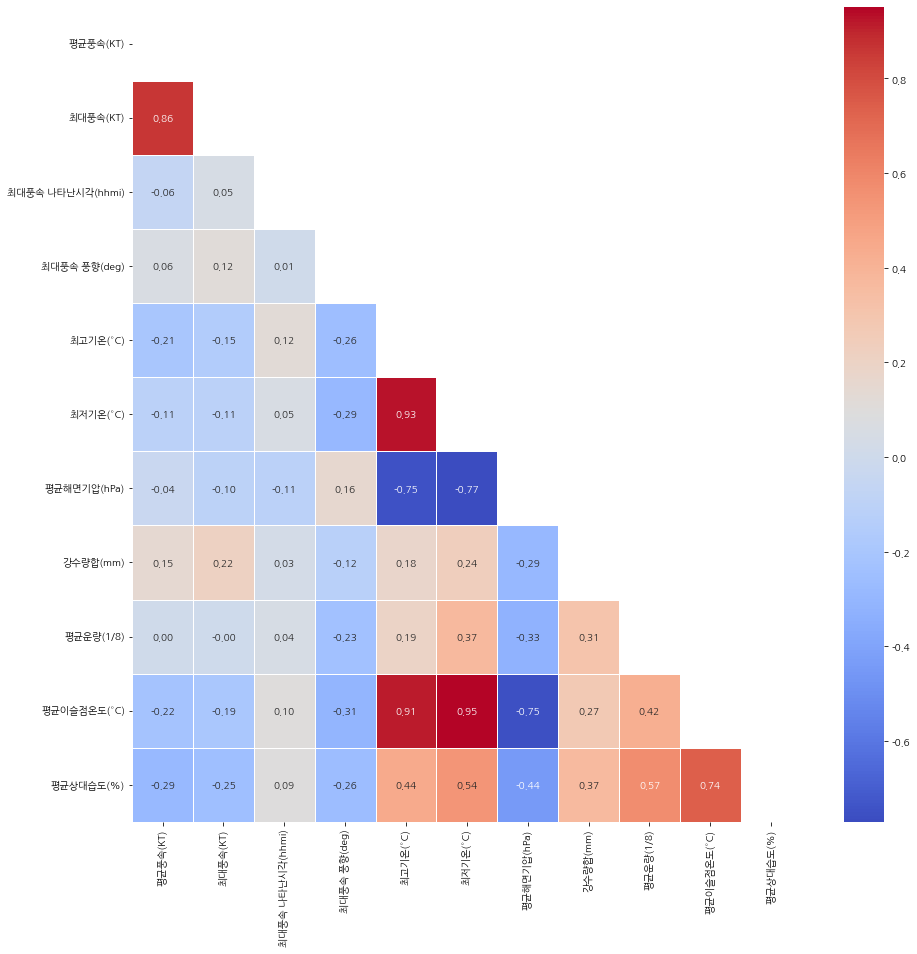

In [29]:
plt.figure(figsize=(15,15))
corr_cols = ['평균풍속(KT)','최대풍속(KT)','최대풍속 나타난시각(hhmi)','최대풍속 풍향(deg)','최고기온(°C)','최저기온(°C)',
'평균해면기압(hPa)','강수량합(mm)','평균운량(1/8)','평균이슬점온도(°C)','평균상대습도(%)']
sub_df = df[corr_cols]
sns.heatmap(data = sub_df[sub_df>-273].corr(), annot=True, mask=np.triu(sub_df[sub_df>-273].corr()),
fmt = '.2f', linewidths=.5, cmap='coolwarm')

<Figure size 1080x1080 with 0 Axes>

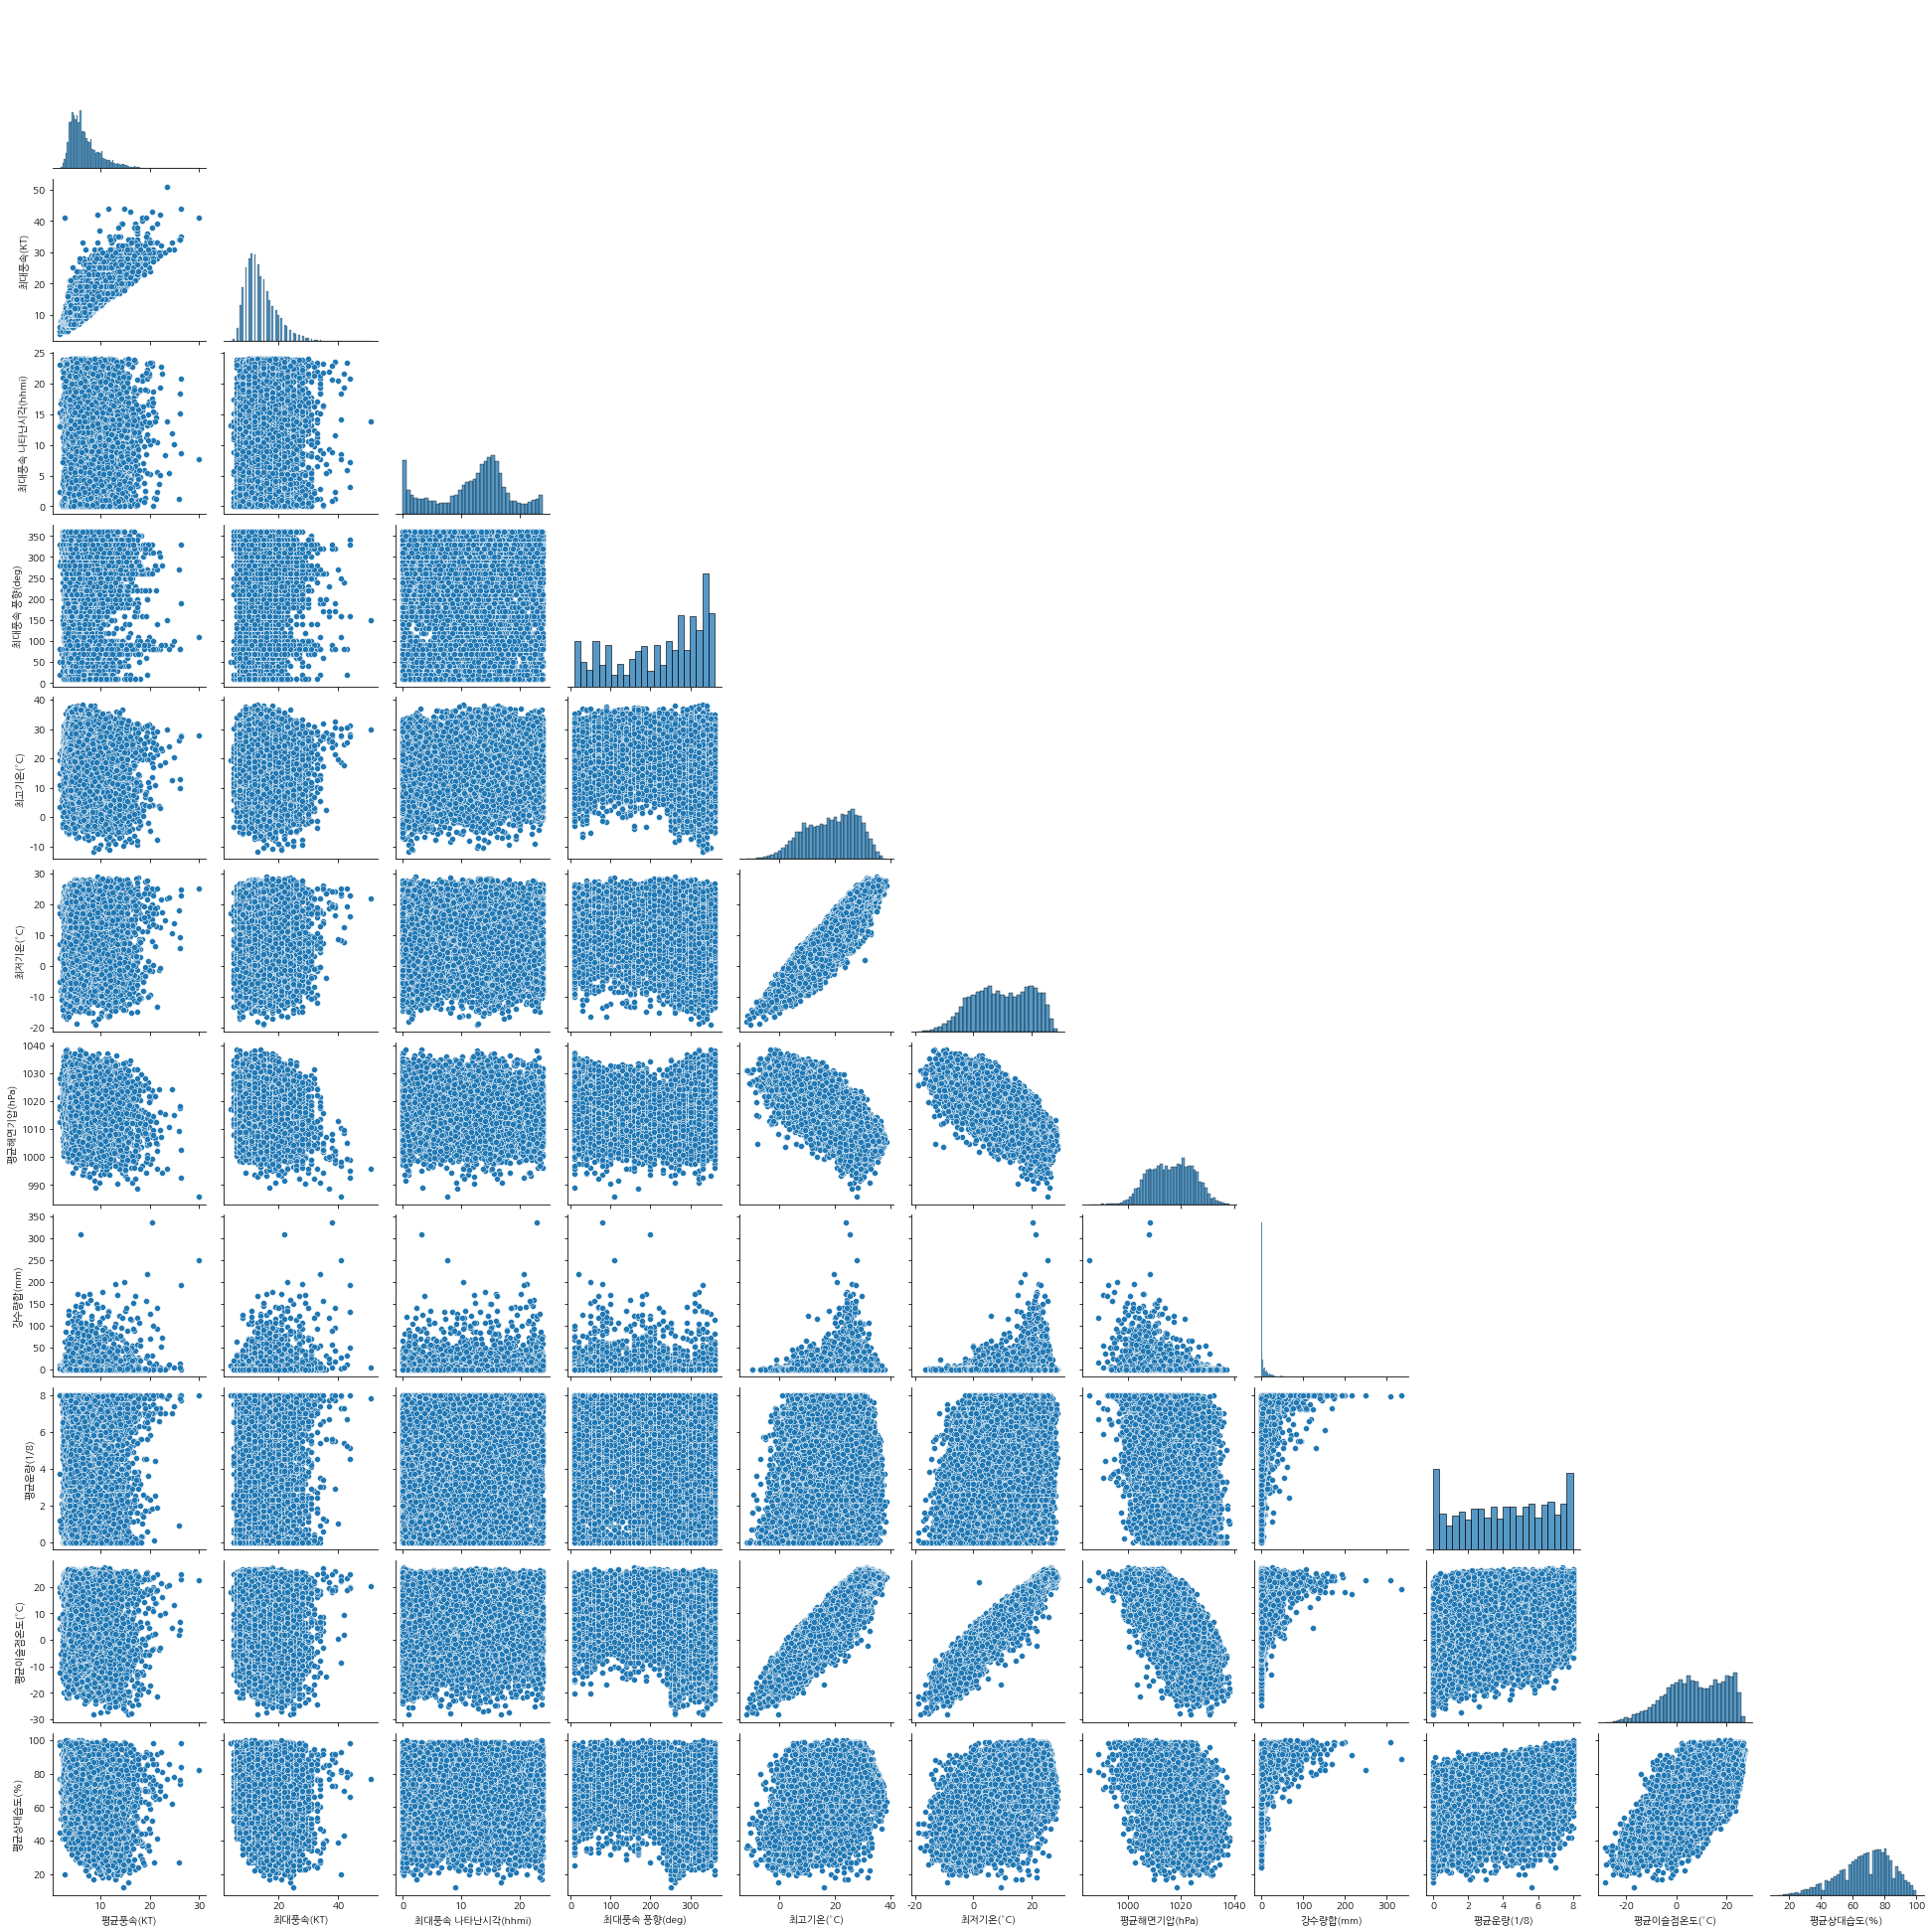

In [30]:
plt.figure(figsize=(15,15))
sns.pairplot(sub_df[sub_df>-273], corner=True)